# BOSTON HOUSE PREDICTION

# Overview
**The data is about predicting housing price MEDV (Median value of owner-occupied homes). in Boston city, features:**


*   Criminal rate (crim)
*   Residential land zoned proportion (zn)
*   Non-retail business acres proportion (indus)
*   Is bounds with river (chas)
*   Nitrogen oxides concentration (nox)
*   Number rooms average (rm)
*   Owner age proportion (age)
*   Weighted distance to cities (dis)
*   Accessibility index (rad)
*   Tax rate (tax)
*   Pupil-teacher ratio (ptratio)
*   Black proportion (black)
*   Percent lower status (lstat)


## Import Library & Reading The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load data
boston = pd.read_csv('boston.csv')

# reading data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Read The Dataset

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Comment : Based on the dataset info, there is no missing value.

## Data Cleaning

In [5]:
# Getting the number of missing values in each column

missing_value = boston.isna().sum()

# Excluding columns that contains 0 missing values

missing_value = missing_value[missing_value > 0]

# Getting the percentages of missing values

percent_missing = missing_value * 100 / boston.shape[0]

# Concatenating the number and perecentage of missing values
# into one dataframe and sorting it

pd.concat([missing_value, percent_missing], axis=1,
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage


## Duplicated Check

In [6]:
# Check Duplicated Data

boston.duplicated().sum()

0

Comment : **No missing value & duplicated dataset**

**Examine the summary statics of boston dataset :**

This is focused on creating a model that uses the 13 features in our dataset to predict the MEDV column, which is the median home value of each home in the dataset (in thousands).

In [7]:
# Random Sample Check

boston.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data shown that, there are 2 doubt columns :

*   Residential land zoned proportion (zn), minimum, 25%, 50% value = 0
*   Is bounds with river (chas), categorical variable which is is apparently also binary (0,1)

Asumption 1 : MEDV max value = 💲50,000 can be an outlier .


In [9]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

## DEEP DIVE EDA!

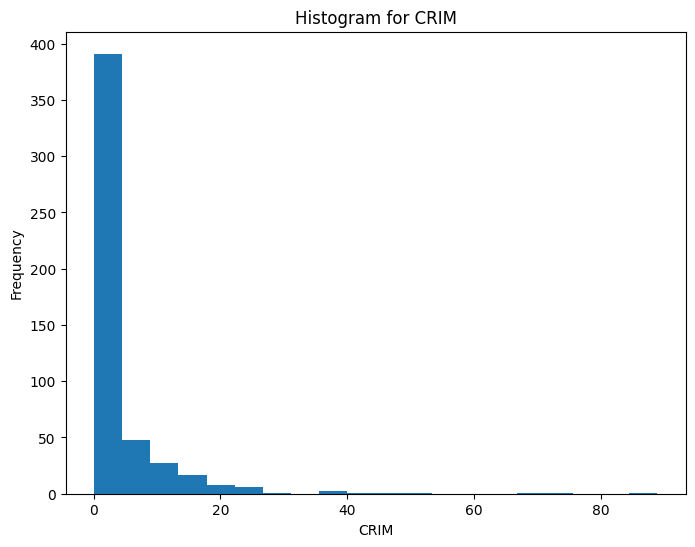

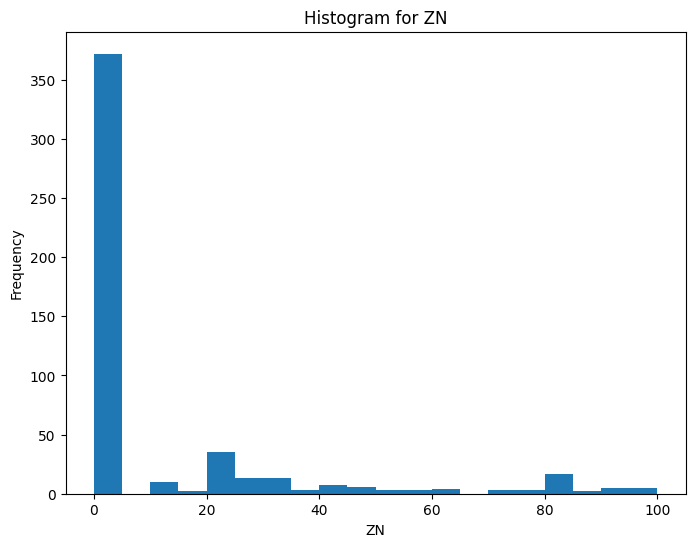

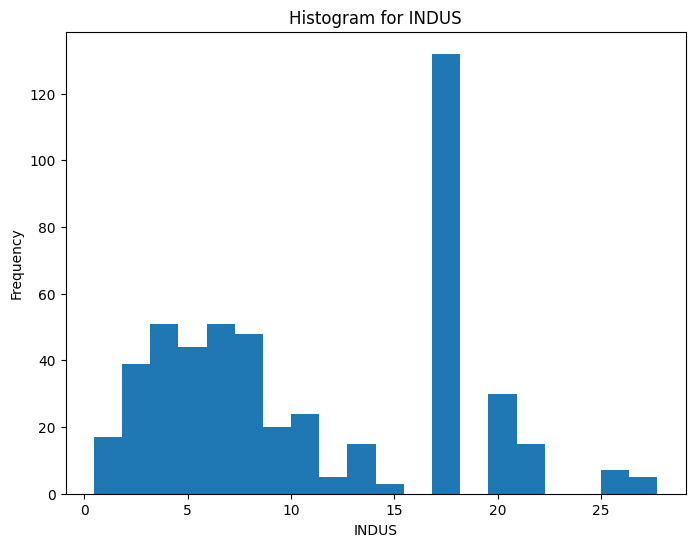

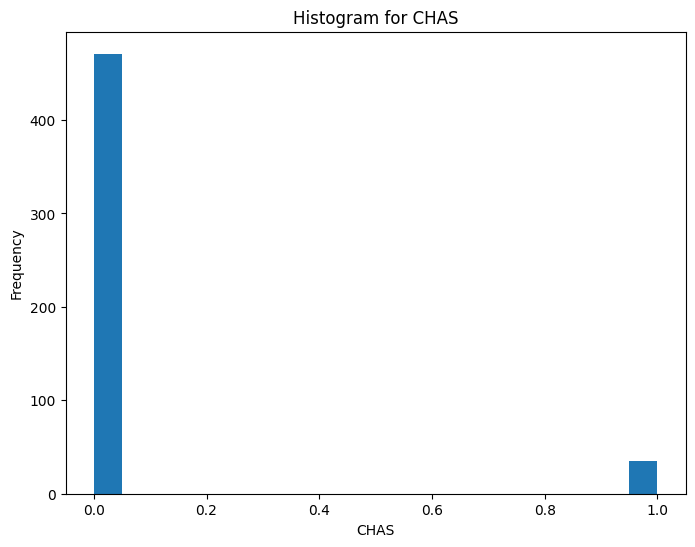

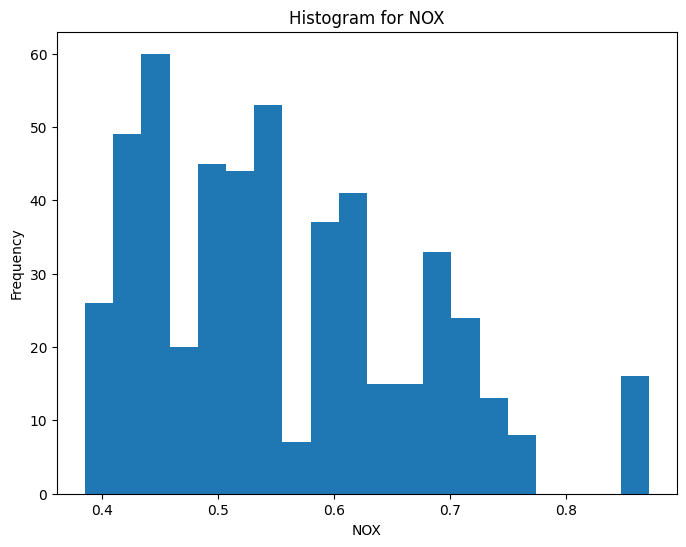

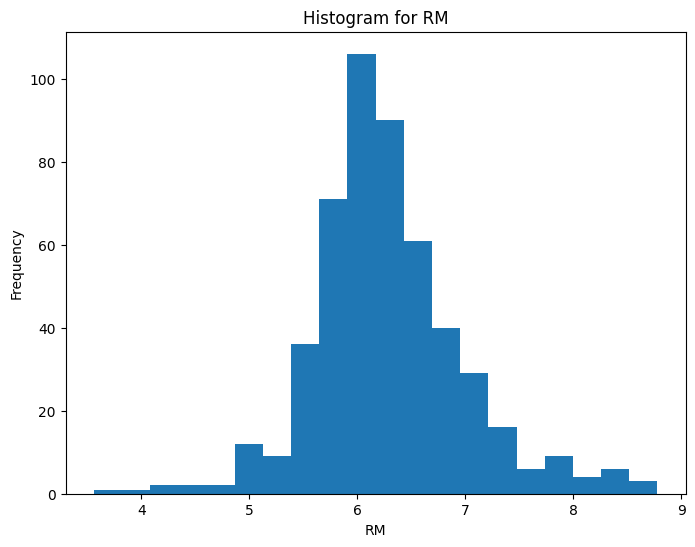

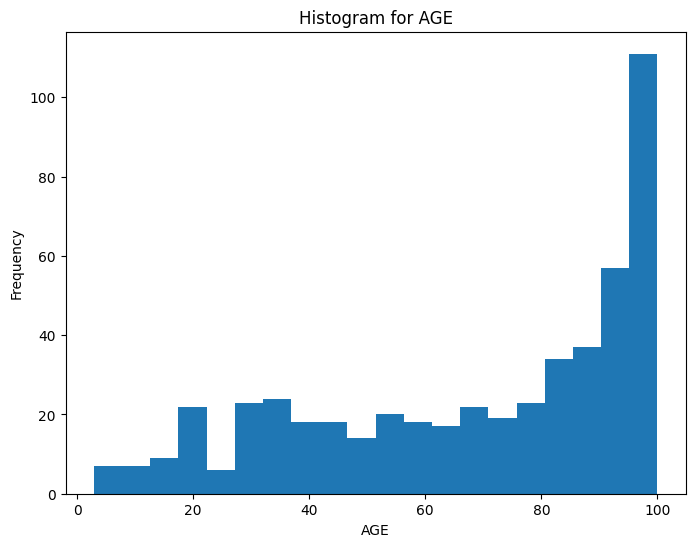

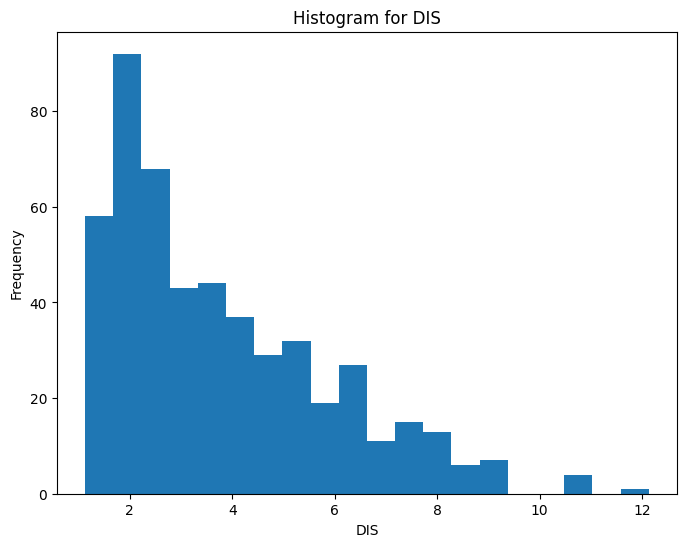

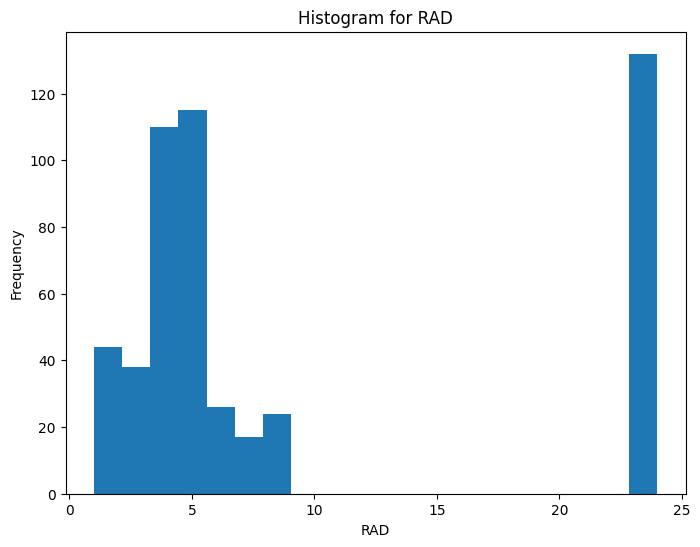

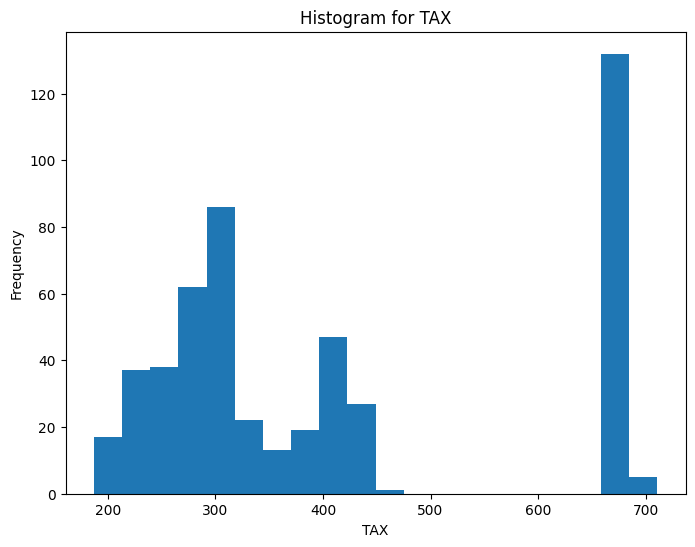

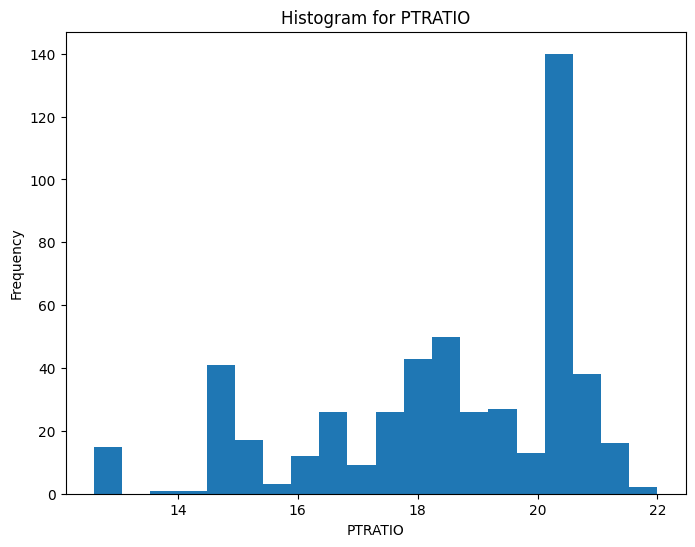

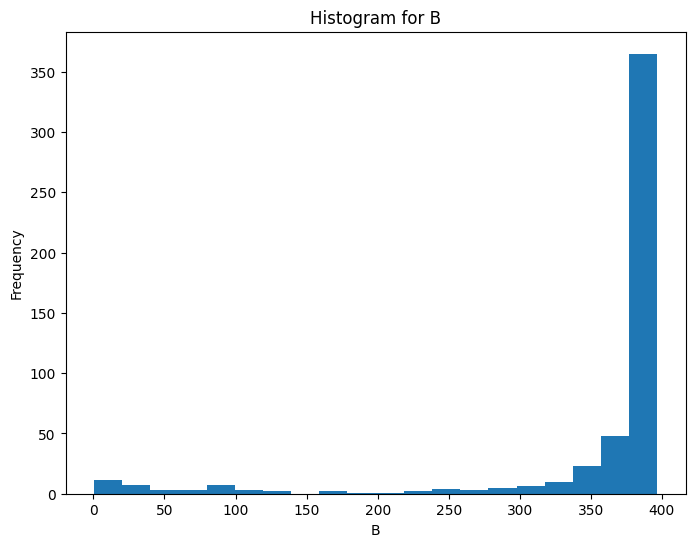

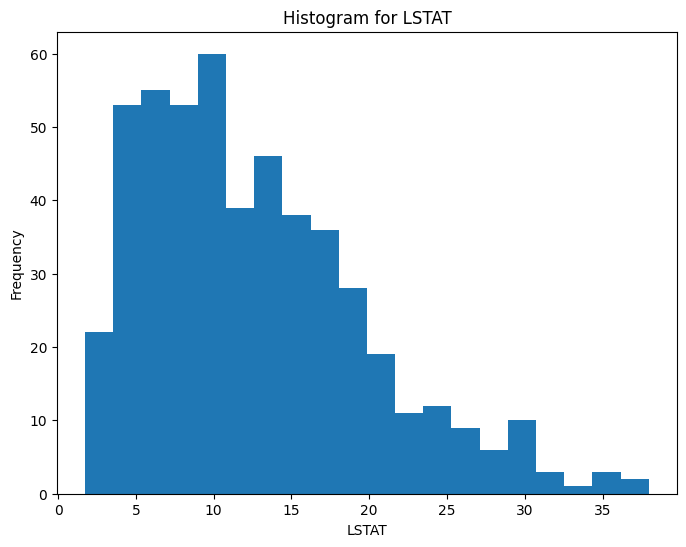

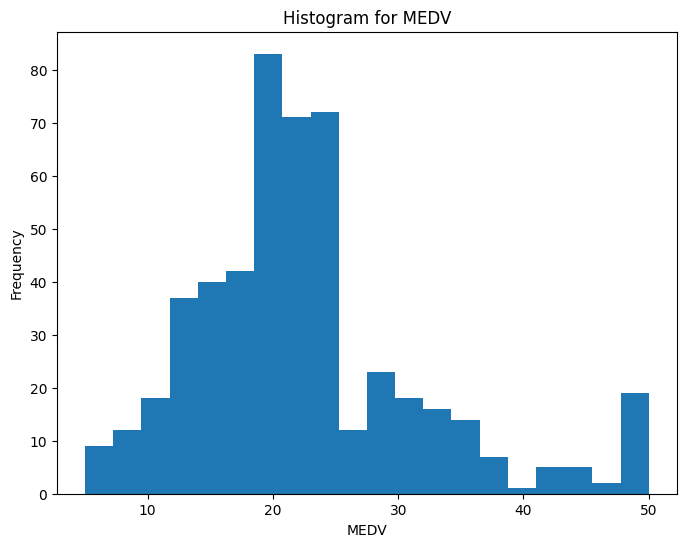

In [10]:
# Check the charts

for column in boston.columns:

    plt.figure(figsize=(8, 6))
    plt.hist(boston[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()

## Check the outliers

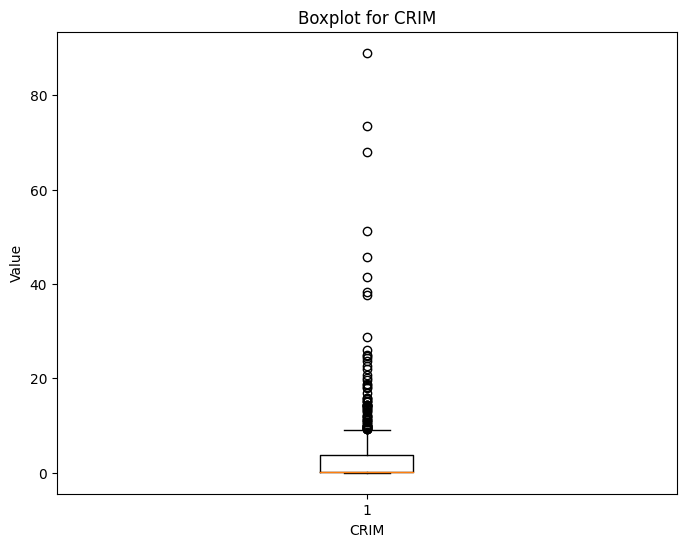

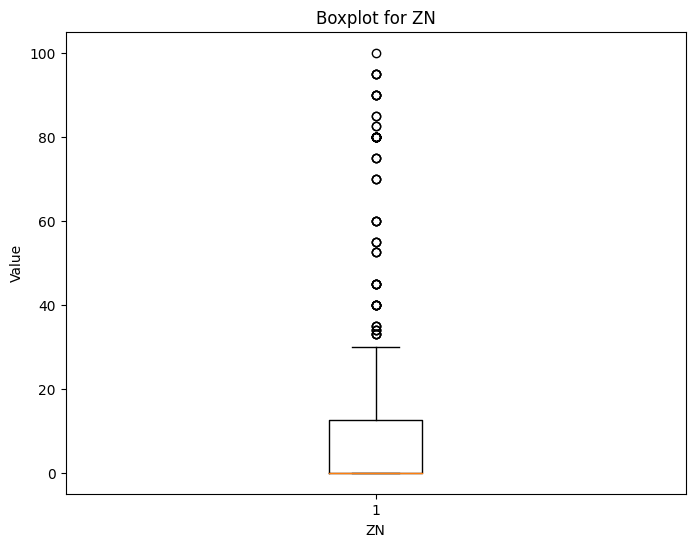

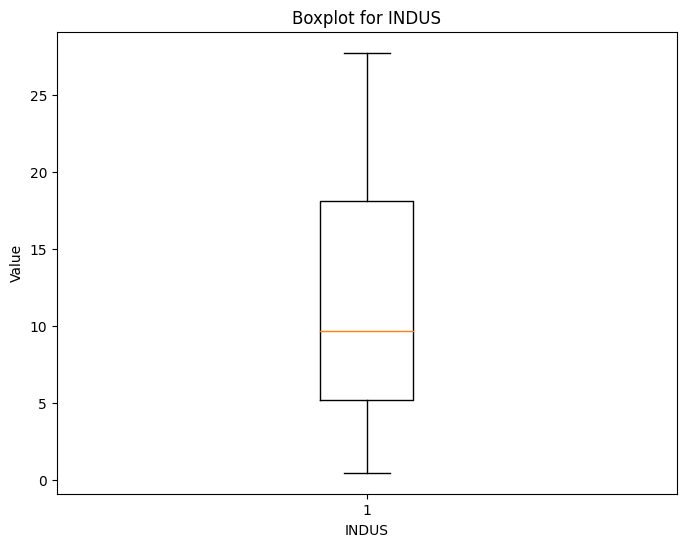

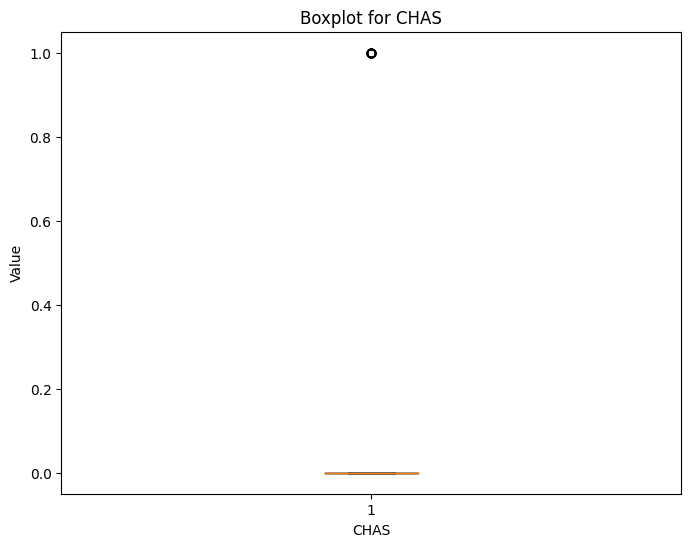

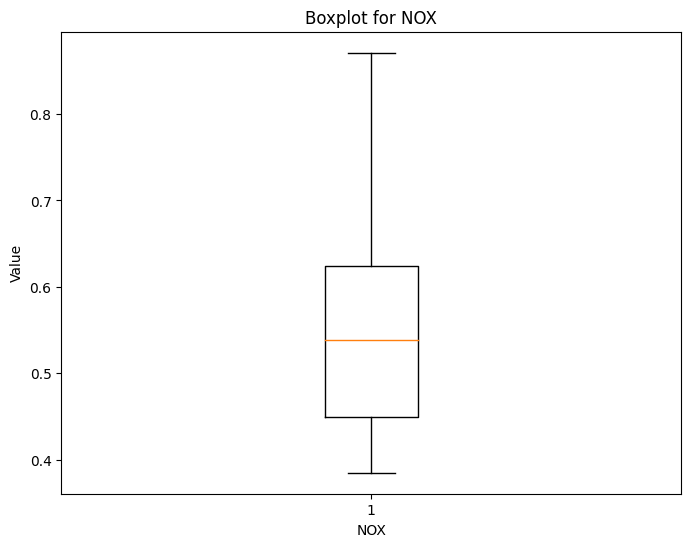

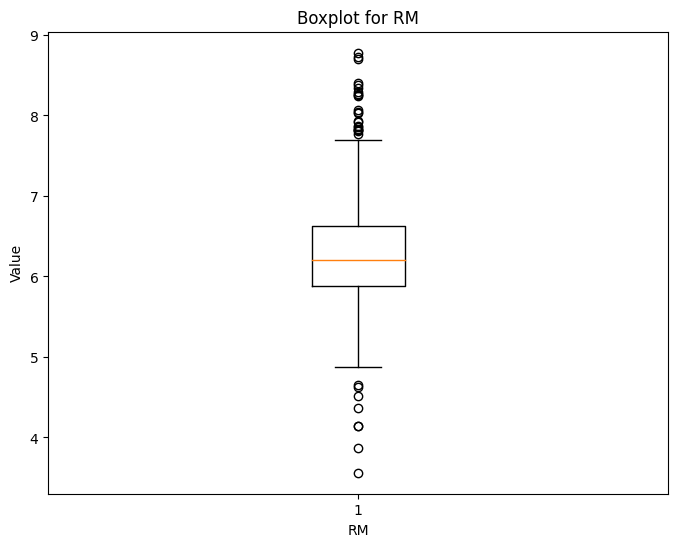

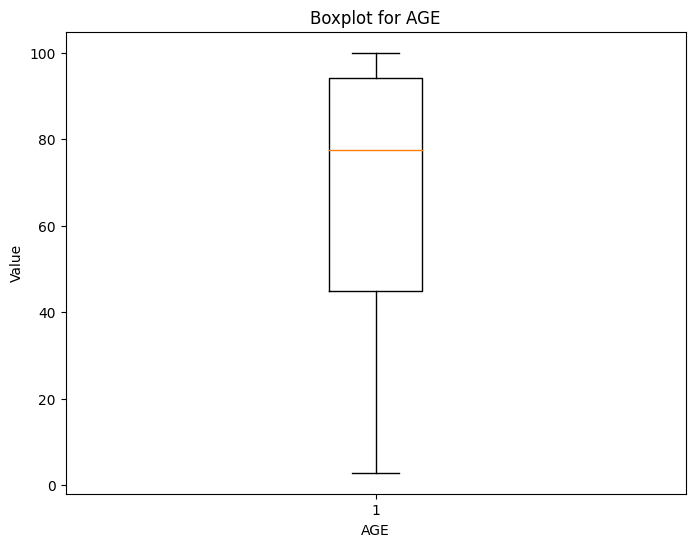

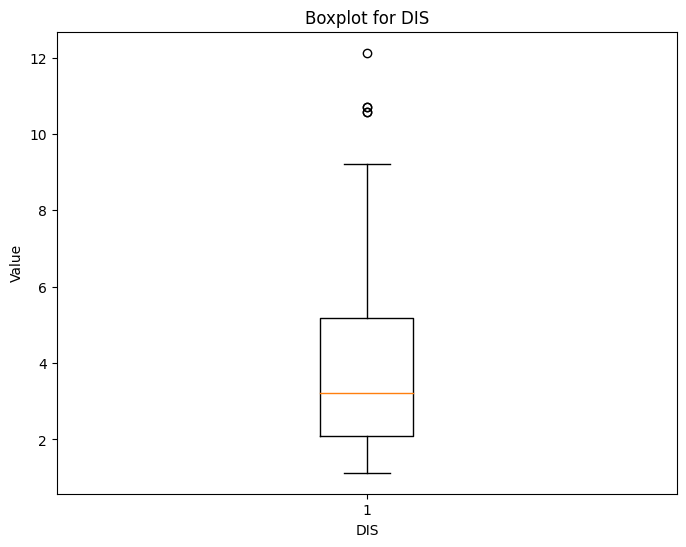

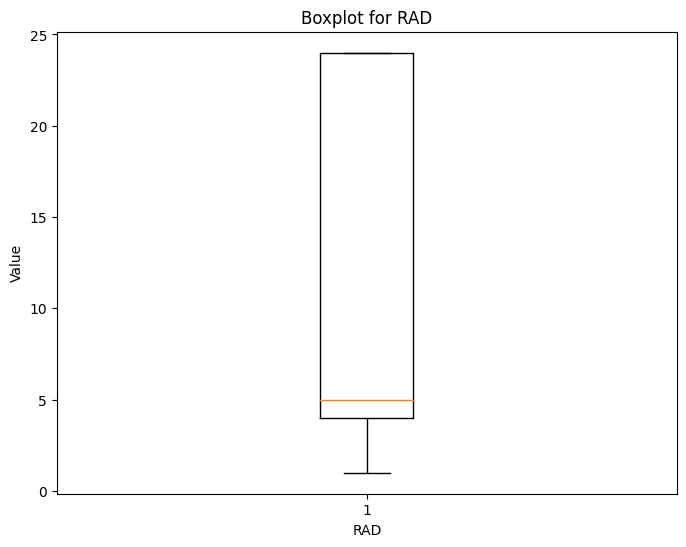

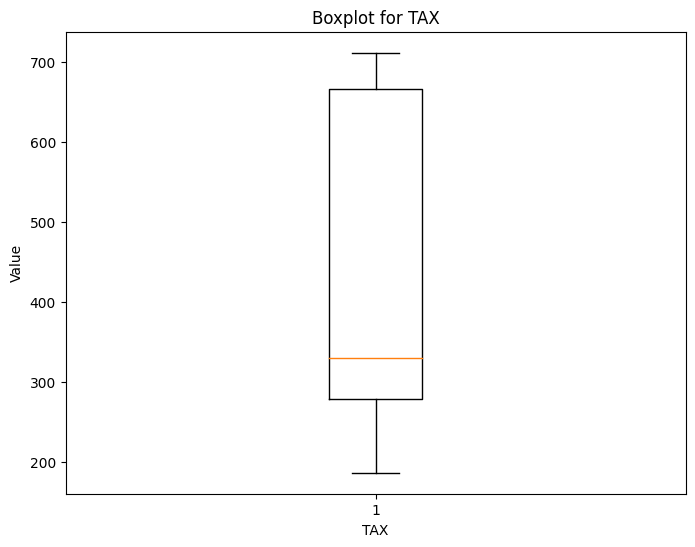

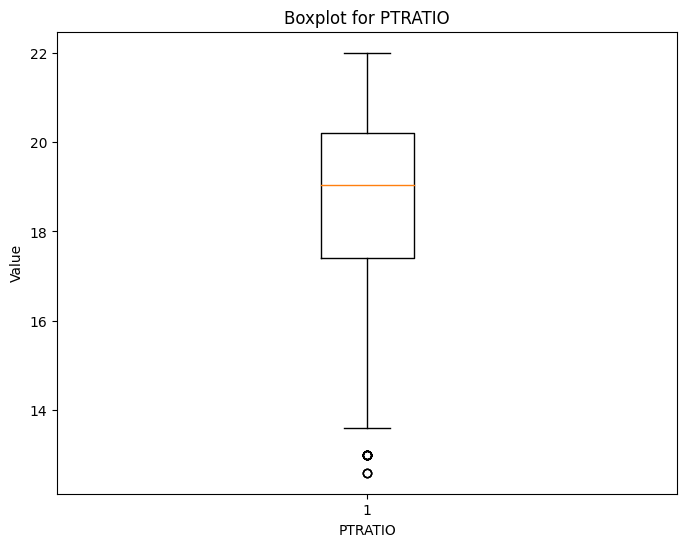

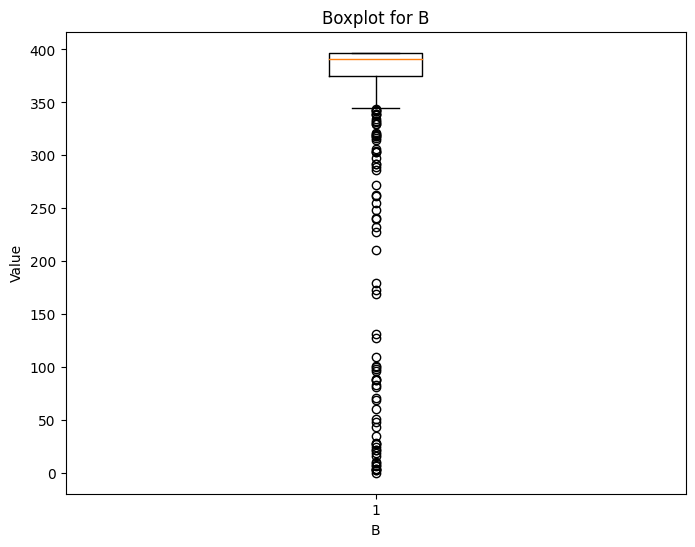

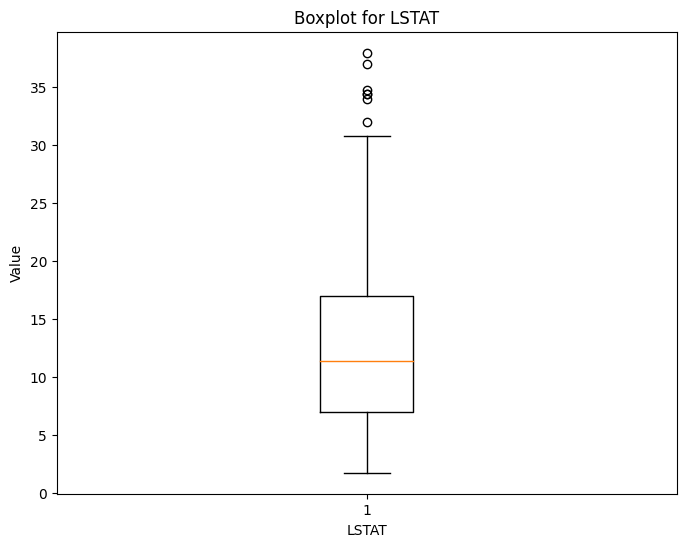

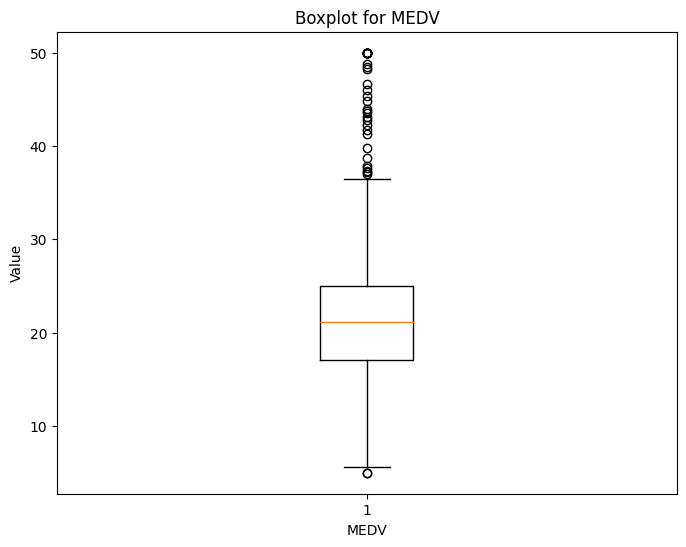

In [ ]:
# Iterate through all numerical columns in the dataset

for column in boston.select_dtypes(include=['number']).columns:

    plt.figure(figsize=(8, 6))
    plt.boxplot(boston[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Boxplot for {column}')
    plt.show()

### Target Distribution

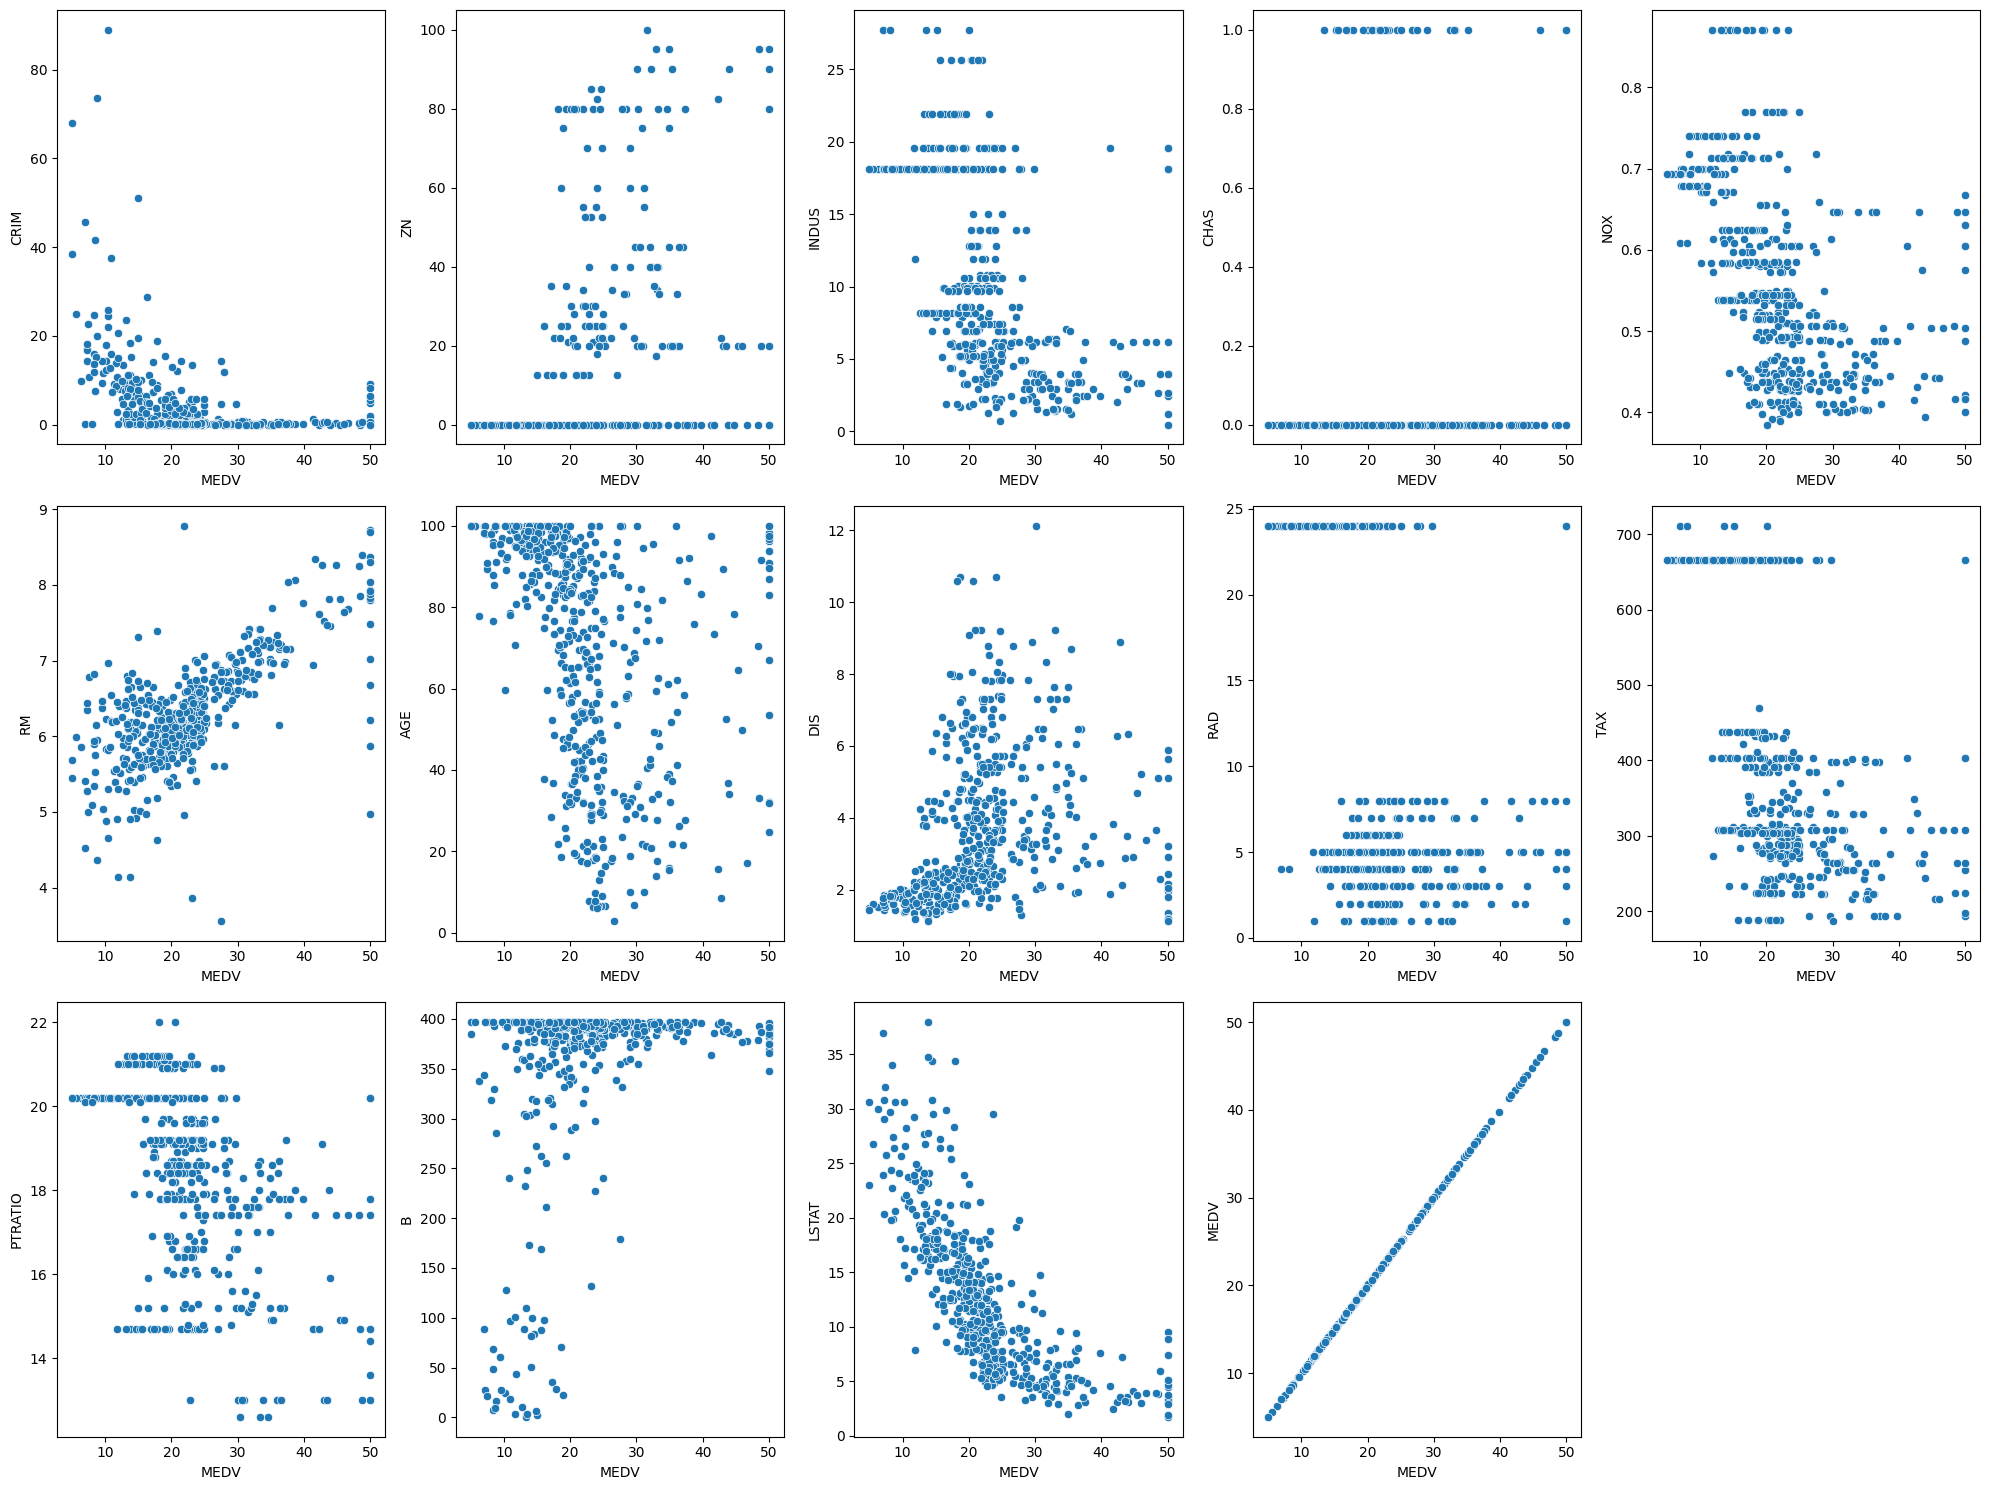

In [ ]:
# Plotting `MEDV` and other columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in boston:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = boston['MEDV'], y = boston[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

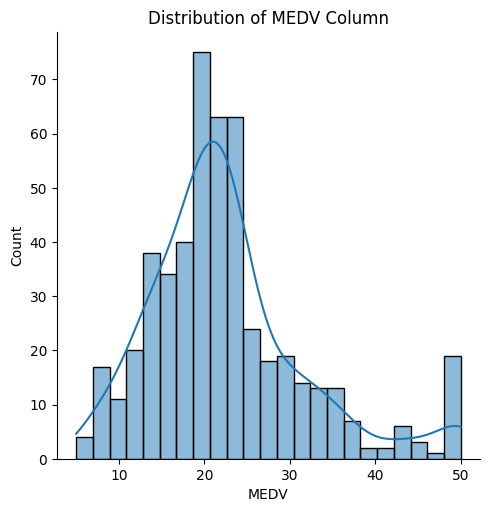

In [11]:
dist = sns.displot(boston['MEDV'], kde = True)
dist.set(title = 'Distribution of MEDV Column')

Summary of MEDV with mean of 22.53 and a standard deviation of 9.20 . There do appear to be a few outliers on the higher end of the MEDV price distribution

In [12]:
boston['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [13]:
boston[boston['MEDV']>=50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


percentage of outliers in medv column >= 50 only 0.03% because we tend to do statistical analytics and modelling. Outliers can cause bias in analysis results and inaccurate predictions. Removing outliers may improve the quality of your analysis and models.

But we keep it. To do more observation! HEHE

### Other columns

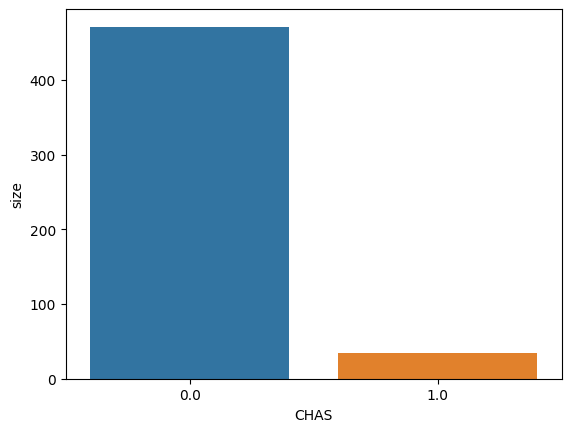

In [ ]:
chas = boston.groupby(['CHAS'],as_index=False).size()
chas_x = chas.sort_values(['size'],ascending=False)

sns.barplot(x=chas_x['CHAS'],
            y=chas_x['size'])
plt.show()

In [14]:
boston.shape

(506, 14)

## Pearson Correlation

Comment : Other way to understand the data by looking for a correlation between the features & prediction house price. Calculate the pearson correlation coefficient between every variable.

Why using pearson correlation = Korelasi Pearson menghasilkan koefesien korelasi yang berfungsi untuk mengukur kekuatan hubungan linier antara
dua variabel dan terdistribusi normal. Jika hubungan dua variabel tidak linier, maka koefesien korelasi Pearson tersebut tidak mencerminkan kekuatan hubungan dua variabel yang sedang diteliti, meski kedua variabel mempunyai hubungan kuat.

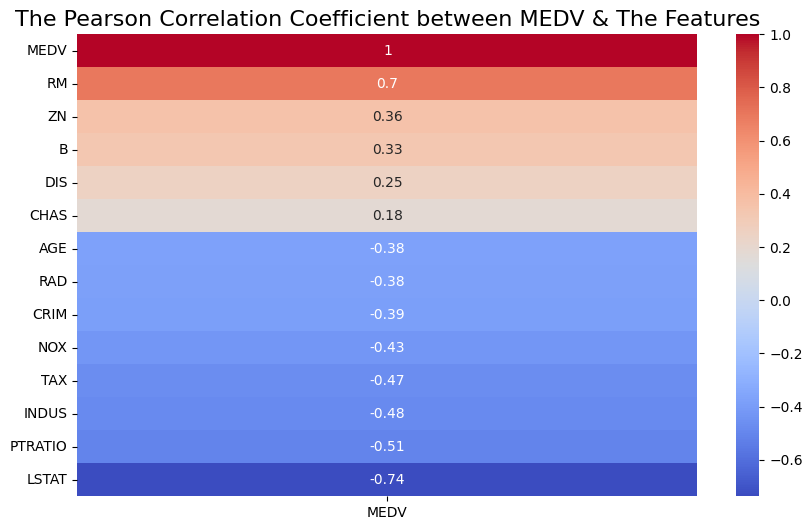

In [ ]:
# calculate the pearson correlation

corr_medv = boston.corr(method = 'pearson')['MEDV'].sort_values(ascending=False)

# background
plt.figure(figsize = (10,6))
sns.heatmap(corr_medv.to_frame(), annot = True, cmap = 'coolwarm')
plt.title('The Pearson Correlation Coefficient between MEDV & The Features', fontsize = 16)
plt.show()

Summary of significant correlations:

*   The positive correlation (Except : MEDV) is RM which is average number of rooms per home. This is saying that as the average number of rooms increase, the MEDV value of the home tends to increase.




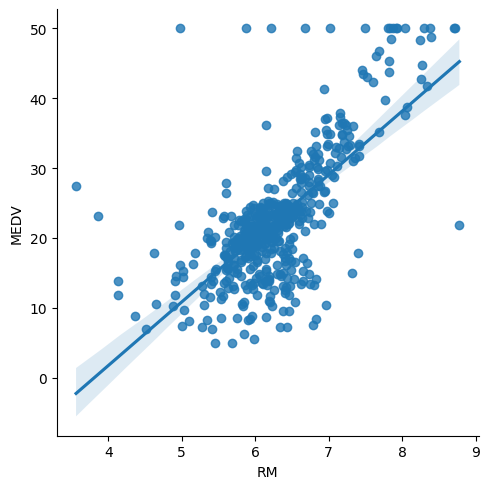

In [ ]:
sns.lmplot(x = 'RM', y = 'MEDV', data = boston)

*   The negative correlation is LSTAT which is -0.74,  LSTAT (% lower status of the population), so this is saying is as the % of lower status of the population increases for a home, the MEDV value of the home tends to decrease.




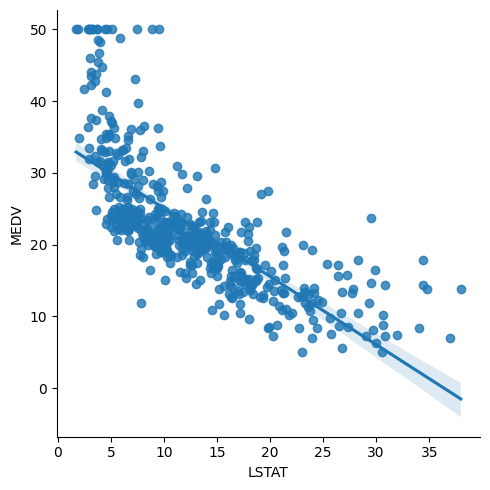

In [ ]:
sns.lmplot(x = 'LSTAT', y = 'MEDV', data = boston)

## Data Pre-processing using Standar Scaller

In [15]:
# creating features and label variable

X = boston.drop(columns = 'MEDV', axis = 1)
y = boston['MEDV']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Split Data

In [18]:
# split train test

from sklearn.model_selection import train_test_split

X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Calculate VIF Score - Feature Selection

checking for multicollinearity using `VIF` and `correlation matrix`

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

a = add_constant(X_boston_train)

vif_df = pd.DataFrame([vif(a.values, i)
               for i in range(a.shape[1])],
              index=a.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.713187
2,ZN,2.465631
3,INDUS,3.877855
4,CHAS,1.096674
5,NOX,4.469150
6,RM,1.947809
7,AGE,2.989948
8,DIS,4.168578
9,RAD,7.658316
10,TAX,8.943301


Comment : Draw correlation plot on training data and perform feature selection on highly correlated features

    There are several features with high VIF scores:

*   'tax' & 'rad' the highest among the features

*   'nox' & 'dis'

*   'indus'

  hence we proceed to draw correlation heatmap to determine which features to drop.

  Standard, VIF above around 5 or 10 indicated significantly **multicollinearity**.

### Correlation Between Variables

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

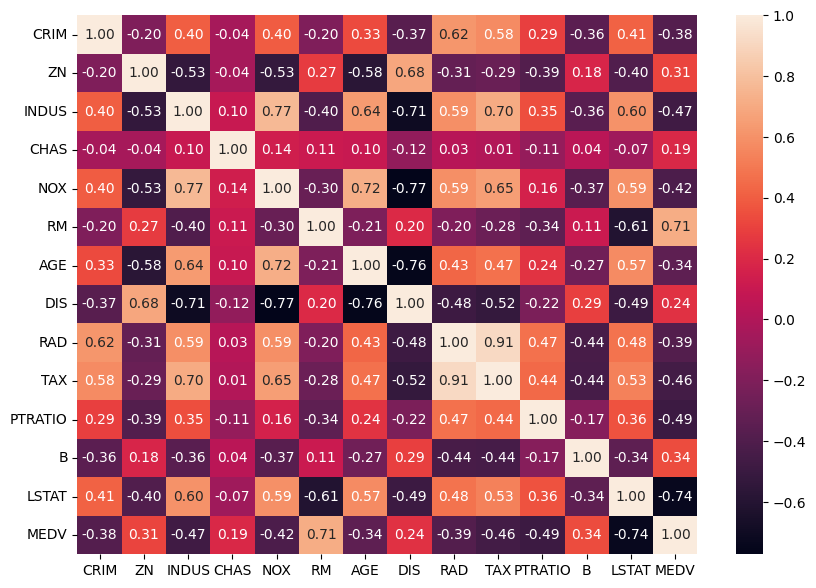

In [20]:
# heatmap correlation
boston_train = pd.concat([X_boston_train, y_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Between 'RAD' & 'TAX' which one should be drop ?

Based on Correlation Analysis: Analyze the pairwise correlation between the variables and the dependent variable. If you have two or more highly correlated independent variables (e.g., correlation coefficient > 0.7 or 0.8), consider dropping one of them. High correlation between independent variables can lead to multicollinearity.

In [21]:
X_boston_train = X_boston_train.drop(columns=['RAD'])
X_boston_test = X_boston_test.drop(columns=['RAD'])

In [22]:
# re-calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

a = add_constant(X_boston_train)

vif_df = pd.DataFrame([vif(a.values, i)
               for i in range(a.shape[1])],
              index=a.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.593872
2,ZN,2.413664
3,INDUS,3.658237
4,CHAS,1.084671
5,NOX,4.411973
6,RM,1.884987
7,AGE,2.977080
8,DIS,4.166015
9,TAX,3.331299
10,PTRATIO,1.776290


**The result of VIF under 5 which is good.**

## Fit Models on Training Data

      a. Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_boston_train, y_boston_train)

LinearRegression()

In [24]:
# prediction of model

y_pred = lr.predict(X_boston_test)

In [25]:
# training accuracy of model

lr.score(X_boston_train, y_boston_train)

0.7432668146680894

In [26]:
# test accuracy of model

lr.score(X_boston_test, y_boston_test)

0.6390347738951404

In [27]:
def r2_score(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    r2_score = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return r2_score

In [28]:
print(r2_score(X_boston_train, y_boston_train, lr))

0.7353875353228645


In [29]:
print(r2_score(X_boston_test, y_boston_test, lr))

0.5903653052068447


## Fit Models on Training Data

      b. Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

# define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_boston_train, y_boston_train)

Ridge(alpha=0.1, random_state=42)

In [31]:
# retrieve the coefficients
# show as a nice dataframe

data = X_boston_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,23.518308
1,CRIM,-0.081022
2,ZN,0.022474
3,INDUS,-0.019493
4,CHAS,3.093697
5,NOX,-14.404510
6,RM,4.729954
7,AGE,-0.010476
8,DIS,-1.412181
9,TAX,0.000750


## Train Multiple Models

      a. with different alpha (lambda)

Note :

*   ridge_reg_pointzeroone (alpha=0.01): The purpose is to assess the model's behavior when there is minimal regularization. It may overfit the training data, allowing coefficients to become very large.
*   ridge_reg_pointone (alpha=0.1): It provides a balance between fitting the data well and preventing overfitting.

*   ridge_reg_one (alpha=1): It aims to strike a balance between fitting the data and preventing overfitting by penalizing large coefficients more strongly.
*   ridge_reg_ten (alpha=10): It aims to heavily penalize large coefficients and, as a result, may produce a simpler model that underfits the data.

## Use different implementation

In [32]:
# First splitting: pretrain and test
X_boston_pretrain, X_boston_test, y_boston_pretrain, y_boston_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Second splitting: train and validation
X_boston_train, X_boston_validation, y_boston_train, y_boston_validation = train_test_split(X_boston_pretrain, y_boston_pretrain, test_size=0.20, random_state=42)

In [33]:
X_boston_validation = X_boston_validation.drop(columns=['RAD'])

X_boston_train = X_boston_train.drop(columns=['RAD'])

X_boston_test = X_boston_test.drop(columns=['RAD'])

In [34]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = X_boston_train.to_numpy()
y_admit_train = y_boston_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)
ridge_reg_pointone.fit(X_admit_train, y_admit_train)
ridge_reg_one.fit(X_admit_train, y_admit_train)
ridge_reg_ten.fit(X_admit_train, y_admit_train)

Ridge(alpha=10, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error

X_admit_validation = X_boston_validation.to_numpy()
y_admit_validation = y_boston_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


The best Ridge Regression Model with Alpha = 10

# Lasso

      b. Lasso

In [36]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = X_boston_train.to_numpy()
y_admit_train = y_boston_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
# 4 models with 4 different alphas (lambda)
# Define Lasso regression models with different alpha values
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)
lasso_reg_pointone.fit(X_admit_train, y_admit_train)
lasso_reg_one.fit(X_admit_train, y_admit_train)
lasso_reg_ten.fit(X_admit_train, y_admit_train)

Lasso(alpha=10, random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error

X_admit_validation = X_boston_validation.to_numpy()
y_admit_validation = y_boston_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas_lasso = [0.01, 0.1, 1.0, 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha_lasso in zip(models, alphas_lasso):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation, y_predict_validation))
    print(f'RMSE of Lasso model with alpha = {alpha_lasso} is {rmse}')

RMSE of Lasso model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso model with alpha = 10 is 5.426622694252769


The best Lasso Model with alpha = 1.0

In [38]:
#Define the best "Ridge "

ridge_best = ridge_reg_ten

In [39]:
lasso_best = lasso_reg_one

## Diagnostic Study to:

1. Validating Assumptions: Diagnostic studies help validate or refute assumptions made about a system or process. Researchers often have initial hypotheses about what might be causing a problem, and a diagnostic study helps test these hypotheses.

2. Monitoring and Evaluation: Diagnostic studies can serve as a baseline for ongoing monitoring and evaluation. After implementing changes based on the findings, organizations can continue to assess and track progress.

### Ridgre Regression - R2 Square Evaluation (Train & Test)

In [40]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict_train)))

R-squared for training data is 0.7485875263669821


In [41]:
# prepare prediction result on test data
X_admit_test = X_boston_test.to_numpy()

# ground truth target
y_admit_test = y_boston_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [42]:
y_predict_test = ridge_best.predict(X_admit_test)

print('R-squared for test data is {}'.format(r2_score(y_admit_test, y_predict_test)))

R-squared for test data is 0.6370794734959775


### Lasso - R2 Square Evaluation (Train & Test)

In [43]:
from sklearn.metrics import r2_score

y_predict2_train = lasso_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict2_train)))

R-squared for training data is 0.7056815963218595


In [45]:
y_predict_test = lasso_best.predict(X_admit_test)

print('R-squared for test data is {}'.format(r2_score(y_admit_test, y_predict_test)))

R-squared for test data is 0.6417655030412066


In [44]:
y_boston_train.shape

(323,)

In [46]:
y_predict_train.shape

(323,)

In [47]:
y_predict2_train.shape

(323,)

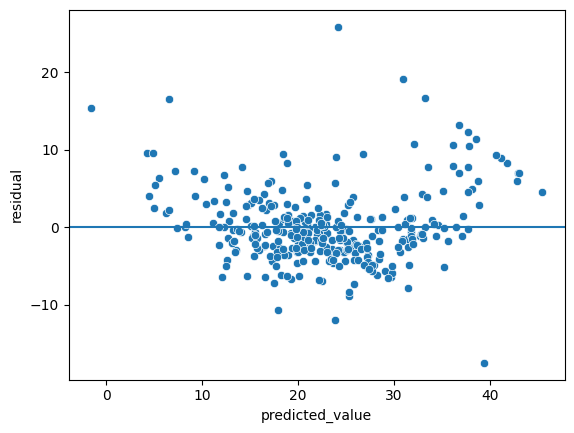

In [48]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()
plt.show()

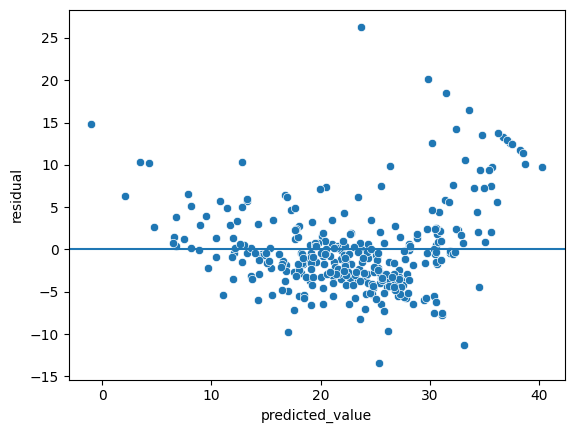

In [56]:
# calculate residuals
residual = y_boston_train - y_predict2_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict2_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()
plt.show()

### Actual Price vs Predicted Price using Ridge Regression

In [55]:
# Create a DataFrame to compare actual prices (y_boston_train) and predicted prices (y_predict_train)
price_comparison = pd.DataFrame({'Actual Prices (MEDV)': y_boston_train, 'Predicted Prices': y_predict_train})

# Display the first few rows of the table
print(price_comparison.head(20))

     Actual Prices (MEDV)  Predicted Prices
54                   18.9         16.672429
28                   18.4         20.956937
423                  13.4         10.459169
244                  17.6         14.768375
111                  22.8         27.768524
228                  46.7         36.154800
80                   28.0         28.347062
29                   21.0         22.481745
309                  20.3         23.672191
352                  18.6         18.053409
257                  50.0         45.448106
193                  31.1         31.758459
466                  19.0         12.304826
74                   24.1         25.726283
505                  11.9         23.844415
44                   21.2         22.251245
223                  30.1         28.732815
440                  10.5         13.507858
385                   7.2          7.357966
212                  22.4         21.130350


In [65]:
# Create a DataFrame to compare actual prices (y_boston_train) and predicted prices (y_predict_train)
price_comparison = pd.DataFrame({'Actual Prices (MEDV)': y_boston_train, 'Predicted Prices': y_predict2_train})

# Display the first few rows of the table
print(price_comparison.head(20))

     Actual Prices (MEDV)  Predicted Prices
54                   18.9         17.644519
28                   18.4         21.861615
423                  13.4          9.465904
244                  17.6         18.924062
111                  22.8         26.948683
228                  46.7         32.409448
80                   28.0         28.057127
29                   21.0         22.769418
309                  20.3         24.841413
352                  18.6         21.560140
257                  50.0         40.280498
193                  31.1         30.572004
466                  19.0         13.300755
74                   24.1         25.134606
505                  11.9         25.304754
44                   21.2         23.481671
223                  30.1         28.790180
440                  10.5         13.664966
385                   7.2          6.778903
212                  22.4         19.168732


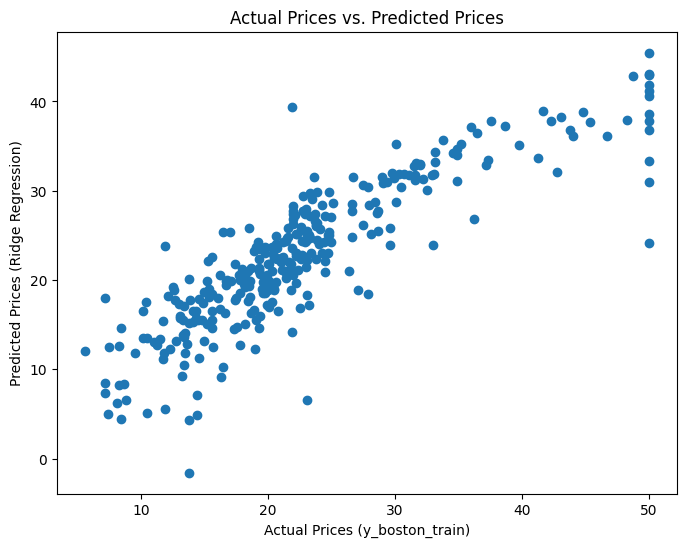

In [67]:
# Plot the actual prices (y_boston_train) vs. predicted prices (y_predict_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_boston_train, y_predict_train)
plt.title("Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices (y_boston_train)")
plt.ylabel("Predicted Prices (Ridge Regression)")
plt.show()

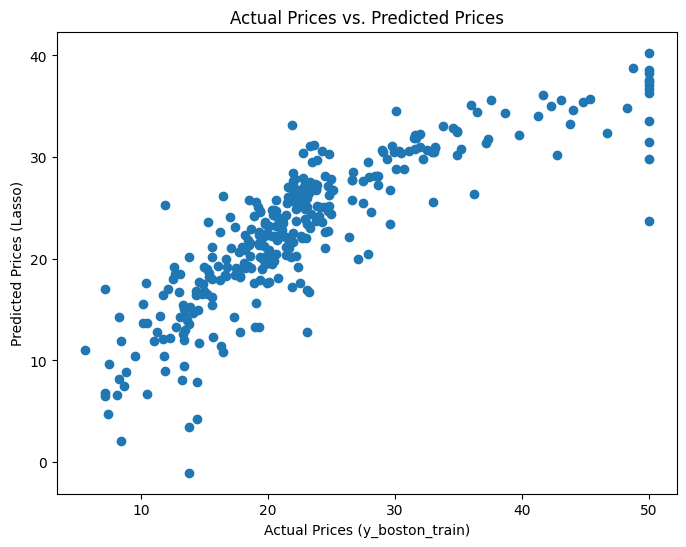

In [68]:
# Plot the actual prices (y_boston_train) vs. predicted prices (y_predict_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_boston_train, y_predict2_train)
plt.title("Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices (y_boston_train)")
plt.ylabel("Predicted Prices (Lasso)")
plt.show()

## Model Evaluation

(Ridge Regression)

Training Error

In [57]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_boston_train)
y_predict2_train = lasso_best.predict(X_boston_train)

# prepare prediction result on test data
y_test_pred = ridge_best.predict(X_boston_test)
y_test2_pred = lasso_best.predict(X_boston_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 4.77864036104011
MAE for training data is 3.3776762058865626
MAPE for training data is 0.168680736633595


In [60]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict2_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict2_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict2_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


Testing Error

5. Evaluate the best models on the test data (+ interpretation)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


In [64]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


In Short, model's performance metrics for both training and test data are relatively consistent. The RMSE, MAE, and MAPE values provide insights into the accuracy and reliability of your model's predictions, with lower values indicating better performance.

MAE and MAPE provide valuable insights into the accuracy of your model's predictions.

In summary, A lower MAE and a lower MAPE indicate better model performance, as they suggest that the model's predictions are closer to the actual values.